In [1]:
import pandas as pd
import os
from glob import glob
import sys
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from scipy import stats
import catboost
from sklearn.model_selection import RandomizedSearchCV

In [2]:
os.chdir("../../models")
path = os.getcwd()

In [5]:
df_xgb_sarcos = pd.read_csv("regression_xgboost_sarcos_inv_insample.csv")
df_lgb_sarcos = pd.read_csv("regression_lightgbm_sarcos_inv_insample.csv")
df_catboost_sarcos = pd.read_csv("regression_catboost_sarcos_inv_insample.csv")

In [6]:
from sklearn.metrics import r2_score

In [7]:
r2_score(df_xgb_sarcos['prediction'], df_xgb_sarcos['target'])

0.9958575654740905

In [8]:
r2_score(df_lgb_sarcos['prediction'], df_lgb_sarcos['target'])

0.9952141421064897

In [9]:
r2_score(df_catboost_sarcos['prediction'], df_catboost_sarcos['target'])

0.9965077417435177

In [17]:
df_xgb_sarcos_o = pd.read_csv("regression_xgboost_sarcos_inv_outofsample.csv")
df_lgb_sarcos_o = pd.read_csv("regression_lightgbm_sarcos_inv_outofsample.csv")
df_catboost_sarcos_o = pd.read_csv("regression_catboost_sarcos_inv_outofsample.csv")

In [13]:
r2_score(df_xgb_sarcos_o['predictions'], df_xgb_sarcos_o['actuals'])

0.9960661374812426

In [15]:
r2_score(df_lgb_sarcos_o['predictions'], df_lgb_sarcos_o['actuals'])

0.995364787257144

In [18]:
r2_score(df_catboost_sarcos_o['predictions'], df_catboost_sarcos_o['actuals'])

0.9965975675295015

In [27]:
results_dict = {}

results_dict['insample'] = {'xgboost': r2_score(df_xgb_sarcos['prediction'], df_xgb_sarcos['target']),
                   'lightgbm': r2_score(df_lgb_sarcos['prediction'], df_lgb_sarcos['target']),
                   'catboost': r2_score(df_catboost_sarcos['prediction'], df_catboost_sarcos['target']),
                   'fastaitabular': 0.0,
                   'tabnet': 0.0}

results_dict['outofsample'] = {'xgboost': r2_score(df_xgb_sarcos_o['predictions'], df_xgb_sarcos_o['actuals']),
                      'lightgbm': r2_score(df_lgb_sarcos_o['predictions'], df_lgb_sarcos_o['actuals']),
                      'catboost': r2_score(df_catboost_sarcos_o['predictions'], df_catboost_sarcos_o['actuals']),
                      'fastaitabular': 0.0,
                      'tabnet': 0.0}

In [31]:
np.round(pd.DataFrame(results_dict), 3)

,insample,outofsample
catboost,0.997,0.997
fastaitabular,0.000,0.000
lightgbm,0.995,0.995
tabnet,0.000,0.000
xgboost,0.996,0.996


In [49]:
from sklearn.metrics import roc_auc_score, accuracy_score

In [37]:
df_xgb_c = pd.read_csv("classification_xgboost_amazon_insample.csv")
df_lgb_c = pd.read_csv("classification_lightgbm_amazon_insample.csv")
df_catboost_c = pd.read_csv("classification_catboost_amazon_insample.csv")

In [44]:
results_dict_c = {}

results_dict_c['insample'] = {'xgboost': roc_auc_score(df_xgb_c['target'], df_xgb_c['prediction']),
                   'lightgbm': roc_auc_score(df_lgb_c['target'], df_lgb_c['prediction']),
                   'catboost': roc_auc_score(df_catboost_c['target'], df_catboost_c['prediction']),
                   'fastaitabular': 0.0,
                   'tabnet': 0.0}

In [46]:
pd.DataFrame(results_dict_c)

,insample
catboost,0.832661
fastaitabular,0.000000
lightgbm,0.849555
tabnet,0.000000
xgboost,0.854720


In [47]:
df_xgb_mc = pd.read_csv("multiclass_xgboost_poker_hands_insample.csv")
df_lgb_mc = pd.read_csv("multiclass_lightgbm_poker_hands_insample.csv")
df_catboost_mc = pd.read_csv("multiclass_catboost_poker_hands_insample.csv")

In [59]:
df_xgb_mco = pd.read_csv("multiclass_xgboost_poker_hands_outofsample.csv")
df_lgb_mco = pd.read_csv("multiclass_lightgbm_poker_hands_outofsample.csv")
df_catboost_mco = pd.read_csv("multiclass_catboost_poker_hands_outofsample.csv")

In [64]:
results_dict_mc = {}

results_dict_mc['insample'] = {'xgboost': accuracy_score(df_xgb_mc['target'], df_xgb_mc['prediction']),
                   'lightgbm': accuracy_score(df_lgb_mc['target'], df_lgb_mc['prediction']),
                   'catboost': accuracy_score(df_catboost_mc['target'], df_catboost_mc['prediction']),
                   'fastaitabular': 0.0,
                   'tabnet': 0.0}

results_dict_mc['outofsample'] = {'xgboost': accuracy_score(df_xgb_mco['actuals'], df_xgb_mco['predictions']),
                   'lightgbm': accuracy_score(df_lgb_mco['actuals'], df_lgb_mco['predictions']),
                   'catboost': accuracy_score(df_catboost_mco['actuals'], df_catboost_mco['predictions']),
                   'fastaitabular': 0.0,
                   'tabnet': 0.0}

In [65]:
pd.DataFrame(results_dict_mc)

,insample,outofsample
catboost,0.690748,0.685960
fastaitabular,0.000000,0.000000
lightgbm,0.647915,0.643243
tabnet,0.000000,0.000000
xgboost,0.699315,0.687955


In [66]:
df_xgb_int = pd.read_csv("regression_xgboost_sarcos_inv_intervals.csv")
df_lgb_int = pd.read_csv("regression_lightgbm_sarcos_inv_intervals.csv")
df_catboost_int = pd.read_csv("regression_catboost_sarcos_inv_intervals.csv")

In [72]:
df_xgb_int.shape

(24910, 2)

In [78]:
df_xgb_sarcos_o.head(10)

,predictions,actuals
0,173.047089,164.0
1,3667.786865,3627.0
2,1688.970093,1672.0
3,3386.685059,3428.0
4,4776.338379,4878.0
5,1290.111816,1427.0
6,1718.547607,1725.0
7,2092.835449,2076.0
8,2566.543457,2584.0
9,2070.119629,2098.0


In [81]:
df_xgb_f = pd.concat([df_xgb_sarcos_o, df_xgb_int], axis = 1)
df_lgb_f = pd.concat([df_lgb_sarcos_o, df_lgb_int], axis = 1)
df_catboost_f = pd.concat([df_catboost_sarcos_o, df_catboost_int], axis = 1)

In [169]:
df_xgb_samp = df_xgb_f.sample(frac = 0.3)
df_lgb_samp = df_lgb_f.sample(frac = 0.3)
df_catboost_samp = df_catboost_f.sample(frac = 0.3)

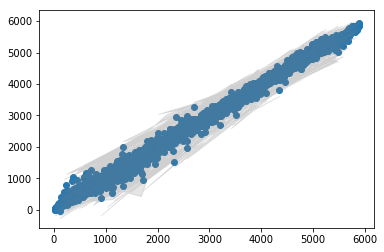

In [170]:
from matplotlib import pyplot as plt
plt.scatter(df_xgb_samp['actuals'], df_xgb_samp['predictions'])
plt.fill_between(df_xgb_samp['actuals'], df_xgb_samp['lower_bound'], 
                 df_xgb_samp['upper_bound'], color = 'gray', alpha = 0.2)
plt.show()

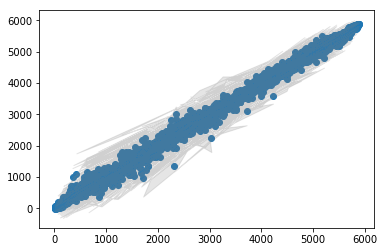

In [171]:
plt.scatter(df_lgb_samp['actuals'], df_lgb_samp['predictions'])
plt.fill_between(df_lgb_samp['actuals'], df_lgb_samp['lower_bound'], 
                 df_lgb_samp['upper_bound'], color = 'gray', alpha = 0.2)
plt.show()

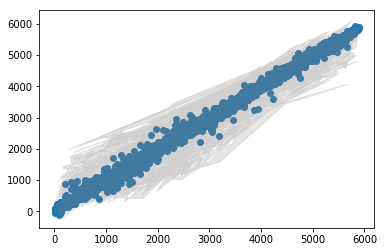

In [172]:
plt.scatter(df_catboost_samp['actuals'], df_catboost_samp['predictions'])
plt.fill_between(df_catboost_samp['actuals'], df_catboost_samp['lower_bound'], 
                 df_catboost_samp['upper_bound'], color = 'gray', alpha = 0.2)
plt.show()